# KNN: Tell me what you like, and I will tell you what you really want
-------------


My friend **Casandra** came to me who has been using some online dating sites to find different people to go out with. She realized that despite the site's recommendations, she didn't like everyone she was matched with. After some introspection, she realized there were three types of people she went out with:
- Guys she didn't like
- Guys she liked in small doses
- Guys she liked in large doses

But she couldn't figure out what made a guy fit into any of these categories. However, she had collected some data which she feels is useful in selecting guys to go out with. 
In this project, we will help her filter future matches to categorize them.

## Inports
Here, we import all the neccessary libraries and modules needed for this project

In [6]:
from numpy import *
import operator
import sys
from collections import namedtuple
import matplotlib
import matplotlib.pyplot as plt

## Datasets
The data collected by the lady is in a text file called datingTestSet.txt. It has 1,000 entries. A new sample is on each line, and its made up of the following features:

- Number of frequent flyer miles earned per year
- Percentage of time spent playing video games
- Liters of ice cream consumed per week

## Preparing the data
Before we can use this data in our KNN classifier, we need to change it to the format that our classifier accepts.
#### Matrix of training examples and vector of class labels
We will write a function which takes a filename string and outputs two things: a matrix of training examples and a vector of class labels.

We open the file, get its content column and row size,create zeros array with this size(column,row) as dimension then we loop through the file and extract the first 3 column for each row and assign it to the zeros array then we take the last column of each row and store in the vector list which serve as label

In [7]:
def file2matrix(filename):
    ''''
    @param filename[string] this is a file name from which the dataset will be extracted
    @return (matrix, list)
        - the matrix is the dataset 
        - the list is a vetor list containing the labels
    ------------------------------------
    @hint:
        - In python 3.*, raw_input() has been replaced with input()
        - It is preferable to use 'with' when opening a file,since it automatically close the file when it ends.
        Also if the file fails to open, it won't execute the codes in its loop.
    '''

    with open(filename) as fr:
        lines = fr.readlines()

        numberOfLines_row = len(lines)                      # Get the column size of the dataset
        column_size = len(lines[0].split('\t')) - 1         # Get the dataset first line,then split it to determine the row size of the dataset(we minus 1 to exlude the lable)

        returnMat = zeros((numberOfLines_row,column_size))  # using the numpy zeros((row,column)) to create an array with rows and columns initialized with 0s 
        classLabelVector = []                               # vector list for the labels

    with open(filename) as fr:
        index = 0
        for line in fr.readlines():
            line = line.strip()                             #strip each row of data
            listFromLine = line.split('\t')                 #return a list of each column data seperated by a comma split using tab.
            #return[index,:] gets all the index row of the array and feel each column of this row with values from listFromLine[0:3]
            returnMat[index,:] = listFromLine[0:3]
            # here we get the last value in the list, which is a string representing the label
            # '-1' here means we start counting anticlock wise.that is the last value in the list.
            classLabelVector.append(listFromLine[-1])  
            index +=1
    data = namedtuple('data',['groupMat','labelVec'])
    return data(returnMat,classLabelVector)

In [12]:
# Load the dataset into a list of matrix and labels.
datingDataMat,datingLabels = file2matrix('data/datingTestSet.txt')
print('dating data matrix \n')
print(datingDataMat)
print('\n dating labels \n')
print(datingLabels[:50]) # print the first 50

dating data matrix 

[[  4.09200000e+04   8.32697600e+00   9.53952000e-01]
 [  1.44880000e+04   7.15346900e+00   1.67390400e+00]
 [  2.60520000e+04   1.44187100e+00   8.05124000e-01]
 ..., 
 [  2.65750000e+04   1.06501020e+01   8.66627000e-01]
 [  4.81110000e+04   9.13452800e+00   7.28045000e-01]
 [  4.37570000e+04   7.88260100e+00   1.33244600e+00]]

 dating labels 

['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike', 'didntLike', 'largeDoses', 'largeDoses', 'didntLike', 'largeDoses', 'didntLike', 'didntLike', 'smallDoses', 'didntLike', 'didntLike', 'didntLike', 'didntLike', 'didntLike', 'smallDoses', 'largeDoses', 'smallDoses', 'didntLike', 'smallDoses', 'largeDoses', 'smallDoses', 'largeDoses', 'smallDoses', 'largeDoses', 'smallDoses', 'didntLike', 'largeDoses', 'didntLike', 'largeDoses', 'didntLike', 'smallDoses', 'didntLike', 'didntLike', 'smallDoses', 'largeDoses', 'largeDoses', 'didntLike', 'smallDoses', 'largeDoses', 'largeDoses', 'largeDoses', 'didntLike', 'did

In [10]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

## Analysing the data
With the help of a scatter plot, we will analyse the data

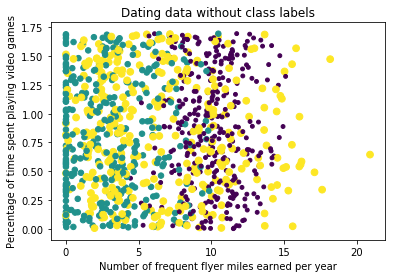

In [29]:
def plot_scatter(x_data, y_data,data_label, x_label, y_label, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    data_label = labels_to_numbers(data_label)
    ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*array(data_label), 15.0*array(data_label))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
title   = 'Dating data with markers changed by class label'
x_label = 'Number of frequent flyer miles earned per year'
y_label = 'Percentage of time spent playing video games'
x_data = datingDataMat[:,1]
y_data = datingDataMat[:,2]
plot_scatter(x_data, y_data,datingLabels, x_label, y_label, title)

The figure above shows dating data with markers changed by class label. It’s easier to identify the
different classes, but it’s difficult to draw conclusions from looking at this data.

In [28]:
def labels_to_numbers(datingLabels):
    '''
    @param datingLabels[list]   this list contain vector labels of the dataset in string (eg ['a','b','c','b','a','e','c']
    @return (list)              this list will content vector labels expressed in integers (eg [1,2,3,2]
    ------------------------------------
    @hint:
        - we first create a dict, which holds each string and its 
        frequency(ie unique strings and the number of appearance.(eg {'largeDoses:98,didntLike:33,smallDoses:26})
        - then we use the keys of this dict created above to form another dict which contain
        the string as key, and a unique numeric lable as value(eg {'largeDoses:1,didntLike:2,smallDoses:3}). This unique 
        numeric label will be used to identify each string.
        - we now replace the datingLabels string labels with the numeric lables(eg [1,3,2,1,2,2,3...] 
        which can now be used in array multiplication 
    '''
    keeps = {}
    labelNum = {}
    count = 1
    for lable in datingLabels:
        keeps[lable] = keeps.get(lable,0)+1
    for keep in keeps.keys():
        labelNum[keep] = count
        count += 1
    for i in range(len(datingLabels)):
        datingLabels[i] = labelNum[datingLabels[i]]

    return datingLabels

## normalizing numeric values
When dealing with values that lie in different ranges, it's common to normalize them. Normalisation means expressing a large range of values to a smaller range( in this case from 0-1) so the formular for that is:
>newValue = (oldValue - min)/(max - min)

- For minVals and maxVals, get the min and max value from the columns array,and not the rows, that is why we used '(0)'. this return a list with result from each column
- From calculation, minVals and ranges are of dimension 1x3, but the dataSet is of dimension 100x3 in this case, we can't peform multiplication or division with such dimension differences, so we use title(from numpy) to form an array of specified dimension. eg. tile(minVals, (m,1)) where minVals = [a,b,c] and m = rows, 1 = column if m = 3, the result becomes 
                       [[a,b,c],
                        [a,b,c],
                        [a,b,c]]
NB// it duplicate the rows by 3 and the column by 1.

In [30]:
def autoNorm(dataSet):
    '''
    @param dataSet[numpy array]    contain range of values 
    @return
        - normDataSet[numpy array] normalise version of the dataSet, that is having range of values between 0-1
        - ranges[numpy array]      contain values from substracting the max value and min values of each column in the dataSet
        - minVals[numpy array]     contain values from calculating the min values of each column in the dataSet.

    '''

    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges  = maxVals - minVals
    normDataSet = zeros(shape(dataSet))     #shape() return the dimension of the array, and zeros() uses it to write an array with the same dimension fills with zeros.Its same as dataSet.shape
    m = dataSet.shape[0]                    #get the row dimension of the array.
    normDataSet = dataSet - tile(minVals, (m,1)) #form an array with 'minVals' and dimension (m,1) then subtract from dataset.[oldValue - min]
    normDataSet = normDataSet/tile(ranges, (m,1)) # (oldValue - min)/(max - min)
    norm = namedtuple('data',['normMat','ranges','minVals'])
    # We need the ranges and minimum values to normalize the test data
    return norm(normDataSet, ranges, minVals)

In [31]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [33]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [34]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [35]:
minVals

array([ 0.      ,  0.      ,  0.001156])

## Building the Classifier(KNN)
The function KNN takes four inputs: the input vector to classify called **inX**, our full matrix of training examples called dataSet, a vector of labels called labels, and, finally, **k**, the number of nearest neighbors to use in the voting. The labels vector should have as many elements in it as there are rows in the dataSet matrix. You calculate the distances B using the Euclidian distance where the distance between two vectors, **xA** and **xB**, with two elements, is given by:
![title](images/euclidianDist.png)

In [36]:
def KNN(inX, dataset, label, k):
    '''
    Experimenting by varying the parameters, we found out that 
    -K:
      This value gives a minimun error number of 10 when it is at 3.
      increasing or reducing this value will increase the error number.
    ----------------------------------------
    @param inX      [list]          the input vector to classify
    @param dataset  [numpy array]   our training dataset
    @param labels   [list]          vector of labels
    @param k        [int]           The number of nearest neighbor used in the voting
    '''

    dataSetSize = dataset.shape[0]                             #get the size of the array, 0 for row and 1 for column size.(Its Numpy)
    #np.tile(inX,(dataSetSize,1) will create an array with value from inX,
    #and dimention of (dataSetSize,1)->[row,column]
    #so that this array can be subtracted from another array (dataset)
    diffMat = tile(inX, (dataSetSize,1)) - dataset             #array subtraction 
    sqDiffMat = diffMat**2                                     #array square 	(we could use math.pow(diffMat,2))
    sqDistances = sqDiffMat.sum(axis = 1)                      #sum the array values column by column (axis = 1), result will be a list.
    distance = sqDistances**0.5                                #sqrt each distances in the list		(we could use math.sqrt(sqDistances))
    #-------------------------------------------------------------------------------------------------
    sortedDistIndicies = distance.argsort()                    #sort from least to greatest(by default), and return the index position of the respective ordering values(thats how argsort works).
    classCount = {}
    for i in range(k):                                         #select k-value, for each index,get the corresponding lable value.
        voteIlabel = label[sortedDistIndicies[i]]   
        #'.get(a,b)' gets the value of 'a' if it exists,if not, it return 'b',
        #now we add one to each value obtain,so if an index already exist,
        #it will return the index current value, and add the one.
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1 
    #this convert the dictionary into list of tuple,eg ('B':1,'A',2) to [('A',2),('B',1)], and sorts it
    """take the classCount
        dictionary and decompose it into a list of tuples and then sort the tuples by the second
        item in the tuple using the itemgetter method from the operator module imported
        in the second line of the program. This sort is done in reverse so you have largest to
        smallest"""
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0] #return the first highest value in the first turple list.

## Training and Testing the classifier

Now that I have the data in a format we can use, I am ready to test our classifier before I give it to my friend to use.

To evaluate the KNN algorithm's accuracy on my data, I will take some portion, say 90%, to train the classifier. Then I will take the remaining 10% to test the classifier and see how accurate it is.

One can measure the performance of a classifier with the error rate. In classification, the error rate is the number of misclassified pieces of data divided by the total number of data points tested. An error rate of 0 means we have a perfect classifier, and an error rate of 1.0 means the classifier is always wrong. In this project, I will measure the error rate with a counter that's incremented every time a piece of data is misclassified. The total number of errors divided by the total number of data points tested will give me the error rate.

- We use file2matrix() to extract the labels and dataSet from a file
- We use autoNorm() to normalise the dataset
- we create 50 testing points from 1000 points.

**NB//** *hoRatio determine how many data will be used for training, (hoRatiox1000). so by varying this 
value, i realised the minimun error rate is reached when hoRatio = 0.05. ie by using 5% of the dataset 
for training. As i increase/decrease beyong this hoRatio, error rate increases*

In [40]:
def datingClassTest():
    '''
    Here we test our classifier on a dating site.
    ----------------------
    '''
    hoRatio = 0.05
    data = file2matrix('data/datingTestSet.txt') 
    norm = autoNorm(data.groupMat)
    m = norm.normMat.shape[0]            # get the number of rows in the array [1000]
    numTestVecs = int(m*hoRatio)         # multiply by a ratio to get the testing number set int(0.05*1000) = 50
    errorCount = 0.0                     # this will be incremented base on bad predictions.
    for i in range(numTestVecs):         # loop through the testing set number
        classifierResult = KNN(norm.normMat[i,:], norm.normMat[numTestVecs:m,:], data.labelVec[numTestVecs:m],3)
        print ("the classifier came back with: %s, the real answer is: %s" % (classifierResult, data.labelVec[i]))
        if (classifierResult != data.labelVec[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))

In [41]:
datingClassTest()

the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: smallDoses, the real answer is: smallDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: smallDoses, the real answer is: smallDoses
the classifier came back with: didntLike, the real a

The total error rate for this classifier on this dataset with these settings is **2%**. Not
bad

## Setting a useful system for our friend
Now that I have tested the classifier on the data, it's time to use it to actually classify people for her. I will provide her with a small program which she will find someone on the dating site and enter his information, then the program will predict how she'll like this person.

In [44]:
def classifyPerson(percentTats = None, ffMiles = None, iceCream = None):
    '''
    Here we provide a command line interface for the user to interact with the classifier.
    he is been prompted the various values, which are been used in the classification.
    -------------------------
    @Hint:
        - in python 3.*, to get input from command line, we use 'input()' but in python 2.*,we use raw_input()
        - the inputs from the user is used for testing, the ranges and minVals returned from 
        'autoNorm()' is used to normalise the testing dataSet.
        - Since we can never trust data coming from users, we use excption handlers to handle unexpected inputs

    NB//, the main unexpected value we check is 'ValueError', then we can check for all other exceptions after that.
    bc in excption handling, we first check for more specific exception before the general ones.
    NB//, I give the fxn parameters each time i call it and check if they are 'None' before i prompt the user for that value.
    this ensures that if the user inputs the first value, and an exception occurs why entering the second value, he won't be 
    prompt for values which he has already entered, it will just start prompting him where he left off.
    '''
    resultDict = {'smallDoses':'in small doses', 'largeDoses':'in large doses','didntLike':'not at all'}
    try:
        if not percentTats: percentTats = float(input("percentage of time spent playing video games?"))
        if not ffMiles: ffMiles = float(input("frequent flier miles earned per year?"))
        if not iceCream: iceCream = float(input("liters of ice cream consumed per year?"))

        data = file2matrix('data/datingTestSet.txt') #get training data from dataset
        norm = autoNorm(data.groupMat)                           # normalise the dataset,
        inArr = array([ffMiles, percentTats, iceCream])          # build the testing set
        normInArr = (inArr-norm.minVals)/norm.ranges             # here we have normalised the testing data set. with values from the training set
        classifierResult = KNN(normInArr,norm.normMat,data.labelVec,3) 
        print ("You will probably like this person: ",resultDict[classifierResult])
    except ValueError as v:
        print('the value entered is not an integer or float')
        classifyPerson(percentTats,ffMiles, iceCream)
    except Exception as e:
        print('Sorry, an unexpected error occured',e)

In [45]:
# Run this cell and fill in the required information,then get the prediction.
classifyPerson()

percentage of time spent playing video games?8
frequent flier miles earned per year?6
liters of ice cream consumed per year?9
You will probably like this person:  in small doses
